In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
df = pd.read_csv("noisy_curvefit_data.csv")

In [6]:
print("Shape:", df.shape)

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

print("First 5 rows", df.head())


print("Last 5 rows", df.tail())
print(df.columns)


Shape: (100, 6)
Number of rows: 100
Number of columns: 6
First 5 rows           x  y_noise_1  y_noise_2  y_noise_3  y_noise_4  y_noise_5
0 -1.000000  11.624419   8.296963  12.201067   7.811725   3.155566
1 -0.929293  10.377466   9.674440  12.198084   8.275006   7.518855
2 -0.858586  10.585100   9.251983  13.186565  12.926586   9.963630
3 -0.787879  10.913928   7.786344  12.552304  11.832379   9.625801
4 -0.717172   8.640287   8.551869   4.741432   8.790834   6.624113
Last 5 rows            x  y_noise_1  y_noise_2  y_noise_3  y_noise_4  y_noise_5
95  5.717172  -1.411918   0.822231  -2.027132  -1.825106   2.746147
96  5.787879   0.344879  -1.718956   2.747559  -6.803779  -5.137472
97  5.858586   0.307133   0.353528   0.967976   5.461567  -0.905616
98  5.929293   0.048657   0.159961   2.482130  -0.414616  -4.334548
99  6.000000  -0.193438  -2.244792   1.930035   4.992414  -6.872850
Index(['x', 'y_noise_1', 'y_noise_2', 'y_noise_3', 'y_noise_4', 'y_noise_5'], dtype='object')


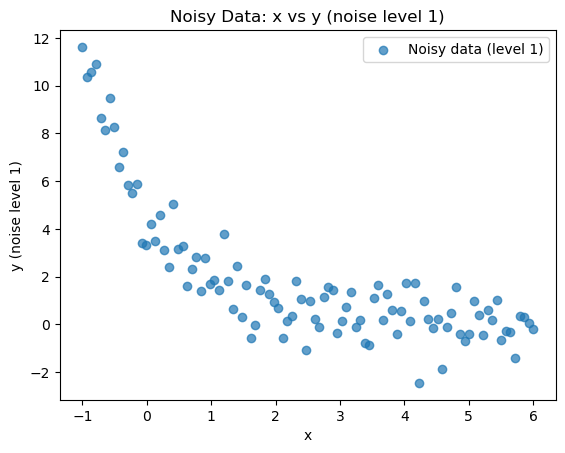

In [7]:
x = df["x"]
y_noise_1 = df["y_noise_1"]

plt.figure()
plt.scatter(x, y_noise_1, label="Noisy data (level 1)", alpha=0.7)
plt.xlabel("x")
plt.ylabel("y (noise level 1)")
plt.title("Noisy Data: x vs y (noise level 1)")
plt.legend()
plt.show()

In [8]:
def model(x, A, k):
    return A * np.exp(-k * x)

In [9]:
p0 = [1, 1]

popt, pcov = curve_fit(model, x, y_noise_1, p0=p0)

A_fit, k_fit = popt
print(f"Fit: y = {A_fit:.2f} * e^(-{k_fit:.2f} * x)")

Fit: y = 4.71 * e^(-0.92 * x)


In [10]:
residuals = y_noise_1 - model(x, A_fit, k_fit)

chi2 = np.sum(residuals**2)

dof = len(x) - len(popt)

chi2_reduced = chi2 / dof
print(f"Reduced chi-squared: {chi2_reduced:.2f}")

Reduced chi-squared: 0.79


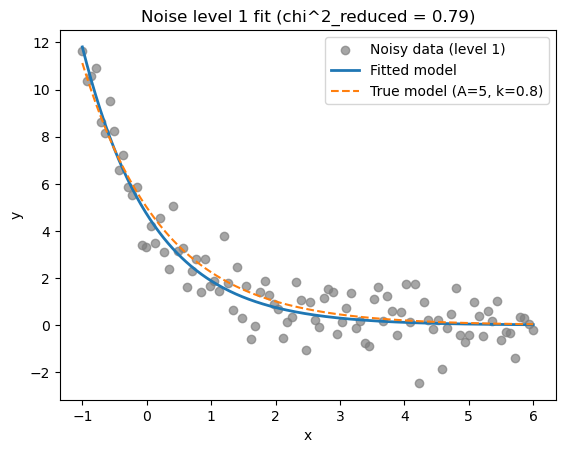

In [11]:
x_smooth = np.linspace(x.min(), x.max(), 500)

y_fit = model(x_smooth, A_fit, k_fit)
y_true = model(x_smooth, 5, 0.8)

plt.figure()
plt.scatter(x, y_noise_1, color="gray", alpha=0.7, label="Noisy data (level 1)")
plt.plot(x_smooth, y_fit, label="Fitted model", linewidth=2)
plt.plot(x_smooth, y_true, linestyle="--", label="True model (A=5, k=0.8)")

plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Noise level 1 fit (chi^2_reduced = {chi2_reduced:.2f})")
plt.legend()
plt.show()

In [12]:
def fit_model(x, y):
   
    p0 = [1, 1]
    popt, pcov = curve_fit(model, x, y, p0=p0)
    A_fit, k_fit = popt

    residuals = y - model(x, A_fit, k_fit)
    chi2 = np.sum(residuals**2)
    dof = len(x) - len(popt)
    chi2_reduced = chi2 / dof

    return A_fit, k_fit, chi2_reduced

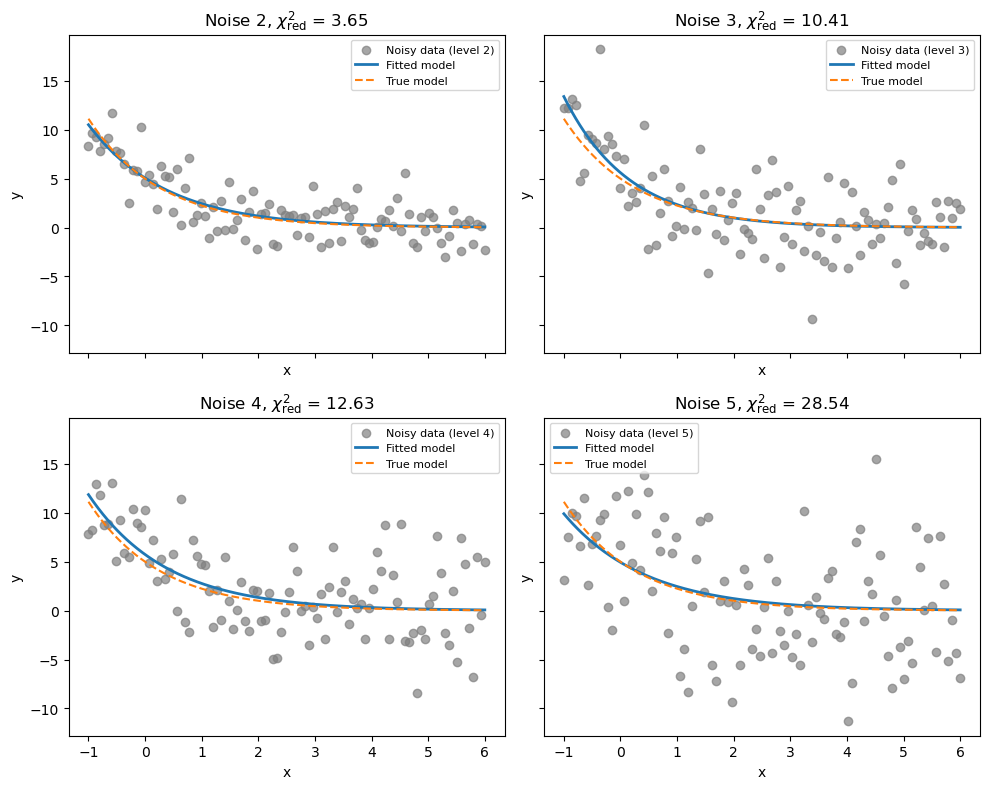

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

noise_cols = ["y_noise_2", "y_noise_3", "y_noise_4", "y_noise_5"]
noise_levels = [2, 3, 4, 5]

x_smooth = np.linspace(x.min(), x.max(), 500)

for ax, col, level in zip(axes.ravel(), noise_cols, noise_levels):
    y_noise = df[col]

    A_fit, k_fit, chi2_reduced = fit_model(x, y_noise)

    y_fit = model(x_smooth, A_fit, k_fit)
    y_true = model(x_smooth, 5, 0.8)

    ax.scatter(x, y_noise, color="gray", alpha=0.7,
               label=f"Noisy data (level {level})")
    ax.plot(x_smooth, y_fit, label="Fitted model", linewidth=2)
    ax.plot(x_smooth, y_true, linestyle="--", label="True model")

    ax.set_title(f"Noise {level}, $\\chi^2_\\mathrm{{red}}$ = {chi2_reduced:.2f}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


In [14]:
results = []

for level in range(1, 6):
    col = f"y_noise_{level}"  # change if your columns are named differently
    y = df[col]
    A_fit, k_fit, chi2_reduced = fit_model(x, y)

    results.append({
        "noise_level": level,
        "A_fit": A_fit,
        "k_fit": k_fit,
        "chi2_reduced": chi2_reduced
    })

params_df = pd.DataFrame(results)
print(params_df)


   noise_level     A_fit     k_fit  chi2_reduced
0            1  4.714814  0.918308      0.790673
1            2  5.063889  0.730396      3.649382
2            3  5.609396  0.870372     10.410207
3            4  5.738727  0.725965     12.626832
4            5  4.943458  0.695012     28.538124


In [16]:
params_df.to_csv("noisy_parameters.csv", index=False)

In [17]:
df = pd.read_csv("solar_system.csv")

print("Shape:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

print("\nFirst five rows:")
print(df.head())

print("\nLast five rows:")
print(df.tail())

print("\nColumn names:")
print(df.columns)

print("\nRow names / index:")
print(df.index)

Shape: (20, 11)
Number of rows: 20
Number of columns: 11

First five rows:
                Attribute Mercury  Venus  Earth   Moon   Mars Jupiter  Saturn  \
0          Mass (10^24kg)   0.330   4.87   5.97  0.073  0.642    1898     568   
1           Diameter (km)    4879  12104  12756   3475   6792  142984  120536   
2        Density (kg/m^3)    5429   5243   5514   3340   3934    1326     687   
3         Gravity (m/s^2)     3.7    8.9    9.8    1.6    3.7    23.1     9.0   
4  Escape Velocity (km/s)     4.3   10.4   11.2    2.4    5.0    59.5    35.5   

  Uranus Neptune   Pluto  
0   86.8     102  0.0130  
1  51118   49528    2376  
2   1270    1638    1850  
3    8.7    11.0     0.7  
4   21.3    23.5     1.3  

Last five rows:
                  Attribute Mercury Venus Earth Moon  Mars  Jupiter   Saturn  \
15     Mean Temperature (C)     167   464    15  -20   -65     -110     -140   
16  Surface Pressure (bars)       0    92     1    0  0.01  Unknown  Unknown   
17          Number 

In [20]:
orbital_period = df.iloc[10, 1:].astype(float).values
perihelion     = df.iloc[8, 1:].astype(float).values
aphelion       = df.iloc[9, 1:].astype(float).values


In [21]:
semi_major_axis = (perihelion + aphelion) / 2

semi_row = pd.Series(
    ["Semi-major axis"] + semi_major_axis.tolist(),
    index=df.columns
)

df = pd.concat([df, semi_row.to_frame().T], ignore_index=True)

print("New shape:", df.shape)



New shape: (21, 11)


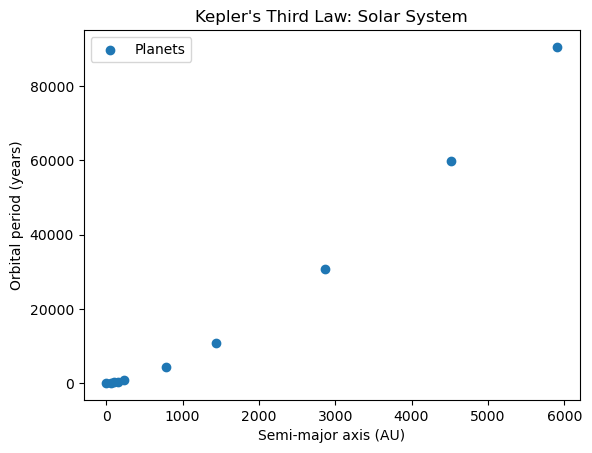

In [22]:
plt.figure()
plt.scatter(semi_major_axis, orbital_period, label="Planets")

plt.xlabel("Semi-major axis (AU)")
plt.ylabel("Orbital period (years)")
plt.title("Kepler's Third Law: Solar System")
plt.legend()
plt.show()


In [23]:
def keplers_third_law(a, m):
    return m * a ** 1.5


In [24]:
p0 = [1.0]
popt, pcov = curve_fit(keplers_third_law, semi_major_axis, orbital_period, p0=p0)
m_fit = popt[0]

print(f"Fit: T = {m_fit:.2f} * a^(3/2)")


Fit: T = 0.20 * a^(3/2)


In [25]:
residuals = orbital_period - keplers_third_law(semi_major_axis, m_fit)
chi2 = np.sum(residuals**2)
dof = len(semi_major_axis) - len(popt)
chi2_reduced = chi2 / dof

print(f"Reduced chi-squared: {chi2_reduced:.2f}")


Reduced chi-squared: 41276.71


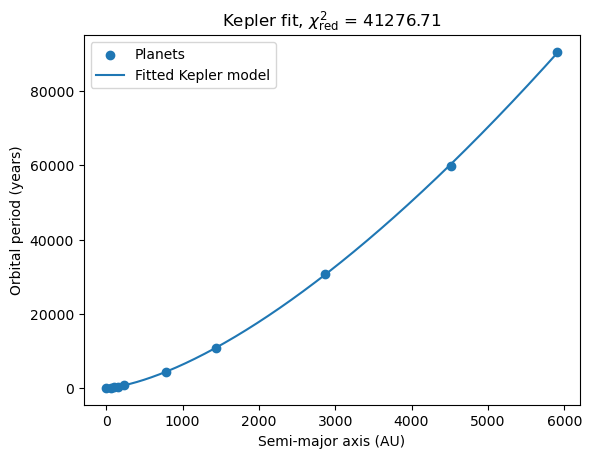

In [26]:
a_smooth = np.linspace(semi_major_axis.min(), semi_major_axis.max(), 500)
T_fit = keplers_third_law(a_smooth, m_fit)

plt.figure()
plt.scatter(semi_major_axis, orbital_period, label="Planets")
plt.plot(a_smooth, T_fit, label="Fitted Kepler model")

plt.xlabel("Semi-major axis (AU)")
plt.ylabel("Orbital period (years)")
plt.title(f"Kepler fit, $\\chi^2_\\mathrm{{red}}$ = {chi2_reduced:.2f}")
plt.legend()
plt.show()


In [28]:
df.to_csv("kepler.csv", index=False)
